# What categories or groups here had high engagement (weekly logins) levels?

In [1]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency


/Users/arnaldo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Importing file
file = 'weekly_logins.csv'
original_df = pd.read_csv(file)

In [3]:
original_df.head(5)

,User Name,Slack Integration,Most Used Page,Had Free Trial,User MRR,Weekly Logins,Company Name,Industry,Company Size,Territory,Sales Call in Trial,Zendesk Integration,Salesforce Integration,Gmail Integration,Most common referrer,Most common IP,Sales Touches to Close,Used Admin Panel,Has Issued Support Request
0,Nilsa Harmon,No,/home,No,39,2,HP,Technology,>$10B,West,No,Yes,No,Yes,hotels.com,165.227.215.62,5,No,No
1,Joni Catano,No,/tool/storyboard,No,39,6,HP,Technology,>$10B,West,No,Yes,Yes,No,hotels.com,159.203.166.41,16,No,Yes
2,Emmett Jeffries,Yes,/tool/search,Yes,169,3,HP,Technology,>$10B,West,Yes,No,Yes,No,hotels.com,159.203.166.41,4,No,Yes
3,Dian Boisse,No,/tool/storyboard,No,39,2,HP,Technology,>$10B,West,No,Yes,No,No,zoom.com,162.243.108.129,15,No,Yes
4,Barbara Herrera,No,/tool/storyboard,No,1299,7,HP,Technology,>$10B,West,No,No,Yes,No,/mail.google.com,159.203.166.41,5,No,Yes


In [4]:
original_df.columns

Index(['User Name', 'Slack Integration', 'Most Used Page', 'Had Free Trial',
       'User MRR', 'Weekly Logins', 'Company Name', 'Industry', 'Company Size',
       'Territory', 'Sales Call in Trial', 'Zendesk Integration',
       'Salesforce Integration', 'Gmail Integration', 'Most common referrer',
       'Most common IP', 'Sales Touches to Close', 'Used Admin Panel',
       'Has Issued Support Request'],
      dtype='object')

In [5]:
#Categorizing variables 

#Binomial variables (Yes/No - 1/0)
binomial    = ['Slack Integration',
               'Had Free Trial',
               'Sales Call in Trial',
               'Zendesk Integration',
               'Salesforce Integration', 
               'Gmail Integration',
               'Used Admin Panel',
               'Has Issued Support Request'
              ]
#Categorical Variables 
categorical = ['User Name',
               'Most Used Page',
               'User MRR',
               'Company Name',
               'Industry', 
               'Company Size',
               'Territory',
               'Most common referrer',
               'Most common IP'
              ]
#Discrete Variables
discrete    = ['Weekly Logins',
               'Sales Touches to Close'
              ]


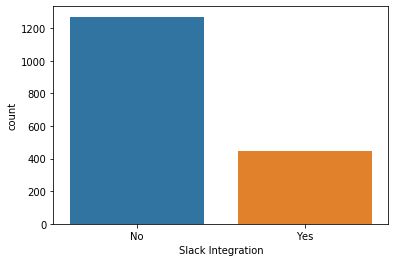

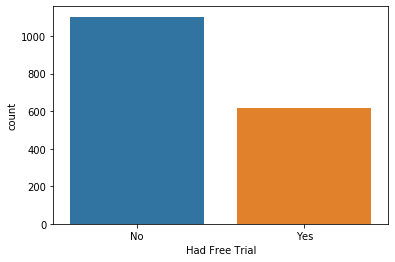

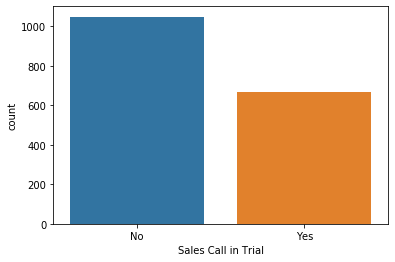

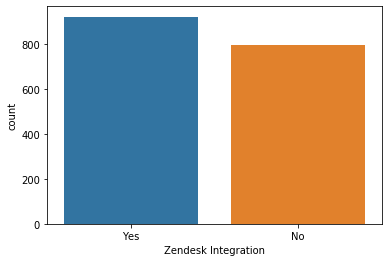

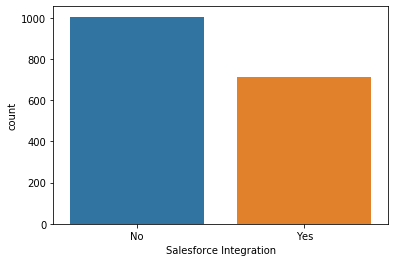

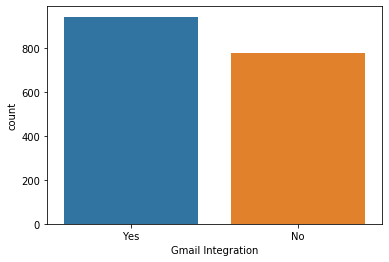

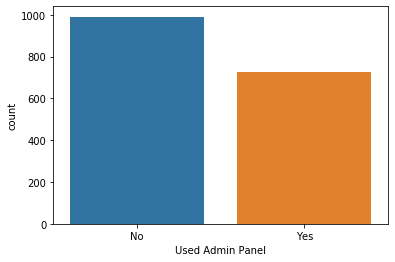

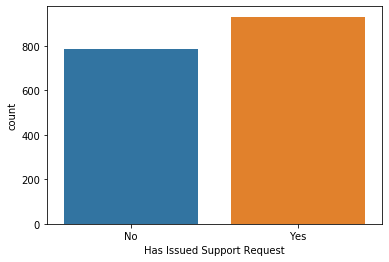

In [6]:
#Plotting Binomial variables to check for unbalaced categories
for i in binomial:
    #fig, ax = plt.subplots(figsize = (7,4))
    sns.countplot(i,
                 data = original_df)
    plt.show()


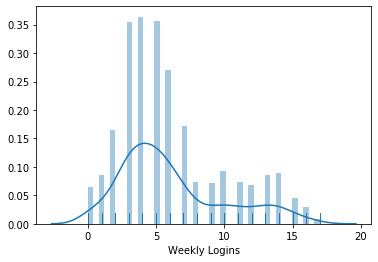

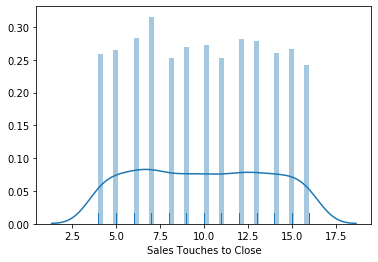

In [7]:
#Plotting discrete variables to check for distributions
for i in discrete:
    sns.distplot(original_df[i], 
             bins = 'sqrt', 
             rug = True)
    plt.show()



In [8]:
original_df['Most common referrer'].value_counts()

/mail.google.com    222
/slack.com          221
/quora              218
/google.com         215
/tripadvisor.com    214
hotels.com          212
/facebook.com       212
zoom.com            204
Name: Most common referrer, dtype: int64

In [9]:
#Binning the weekly logins 
original_df['WL Bins'] = pd.cut(original_df['Weekly Logins'], bins = [-1,0,2,5,7,14,20])

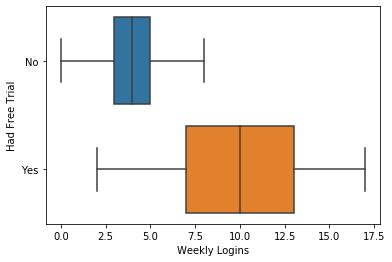

In [10]:
sns.boxplot(x='Weekly Logins', y='Had Free Trial', data=original_df)

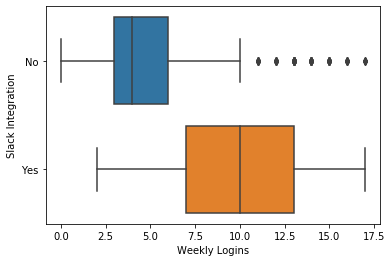

In [11]:
sns.boxplot(x='Weekly Logins', y='Slack Integration', data=original_df)

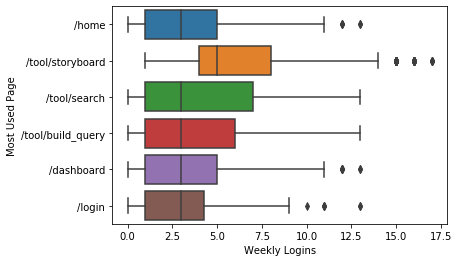

In [12]:
sns.boxplot(x='Weekly Logins', y='Most Used Page', data=original_df)

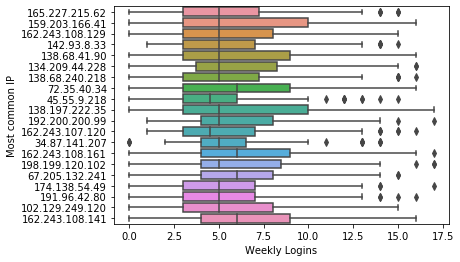

In [13]:
sns.boxplot(x='Weekly Logins', y='Most common IP', data=original_df)

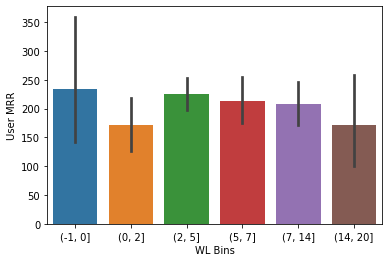

In [14]:
sns.barplot(x='WL Bins', y='User MRR', data=original_df)

In [15]:
#All integrations
original_df['all_int'] = 0
for row in original_df.iterrows():
    if row[1].loc['Slack Integration'] == 'Yes' and\
       row[1].loc['Zendesk Integration'] == 'Yes' and\
       row[1].loc['Salesforce Integration'] == 'Yes' and\
       row[1].loc['Gmail Integration'] == 'Yes':
        
        original_df.loc[row[0],'all_int'] = 1

In [16]:
original_df['free+call'] = 0
for row in original_df.iterrows():
    if row[1].loc['Had Free Trial'] == 'Yes' and\
       row[1].loc['Sales Call in Trial'] == 'Yes':
        
        original_df.loc[row[0],'free+call'] = 1

In [17]:
#As we are dealing mostly with non-numerical variables, the best approach is
# to use the Chi-squared test
for column in original_df:
    #Cross tabulation table
    ct = pd.crosstab(original_df['WL Bins'],original_df[column])
    chi2, p, dof, arr = chi2_contingency(ct)
    print(column, round(chi2,1), p)

User Name 8577.8 0.4893193904159585
Slack Integration 737.3 4.302757531591587e-157
Most Used Page 392.6 1.021231799660074e-67
Had Free Trial 1143.3 5.561983090642363e-245
User MRR 11.6 0.31186786911416103
Weekly Logins 8590.0 0.0
Company Name 117.3 0.298206172252198
Industry 37.8 0.3417259629603866
Company Size 16.8 0.6630931545739548
Territory 13.3 0.2056184881539473
Sales Call in Trial 3.2 0.6650457976513324
Zendesk Integration 5.3 0.3816561639405937
Salesforce Integration 8.6 0.12439941738562384
Gmail Integration 4.1 0.5317243506184947
Most common referrer 38.3 0.3225070796466822
Most common IP 112.2 0.11014668277694321
Sales Touches to Close 39.3 0.9824624601611793
Used Admin Panel 5.7 0.33975868063309134
Has Issued Support Request 5.1 0.3978979698426752
WL Bins 8590.0 0.0
all_int 76.3 5.084760730662129e-15
free+call 366.3 5.3397111057276685e-77


In [18]:
for column in original_df[original_df['all_int'] == 1]:
    ct = pd.crosstab(original_df['WL Bins'],original_df[column])
    chi2, p, dof, arr = chi2_contingency(ct)
    print(column, round(chi2,1), p)

User Name 8577.8 0.4893193904159585
Slack Integration 737.3 4.302757531591587e-157
Most Used Page 392.6 1.021231799660074e-67
Had Free Trial 1143.3 5.561983090642363e-245
User MRR 11.6 0.31186786911416103
Weekly Logins 8590.0 0.0
Company Name 117.3 0.298206172252198
Industry 37.8 0.3417259629603866
Company Size 16.8 0.6630931545739548
Territory 13.3 0.2056184881539473
Sales Call in Trial 3.2 0.6650457976513324
Zendesk Integration 5.3 0.3816561639405937
Salesforce Integration 8.6 0.12439941738562384
Gmail Integration 4.1 0.5317243506184947
Most common referrer 38.3 0.3225070796466822
Most common IP 112.2 0.11014668277694321
Sales Touches to Close 39.3 0.9824624601611793
Used Admin Panel 5.7 0.33975868063309134
Has Issued Support Request 5.1 0.3978979698426752
WL Bins 8590.0 0.0
all_int 76.3 5.084760730662129e-15
free+call 366.3 5.3397111057276685e-77


In [19]:
#ONE HOT ENCODING FOR FURTHER DEVELOPMENT

to_onehot   = ['Slack Integration',
               'Had Free Trial',
               'Sales Call in Trial',
               'Zendesk Integration',
               'Salesforce Integration', 
               'Gmail Integration',
               'Used Admin Panel',
               'Has Issued Support Request',
               'Most Used Page',
               'Company Name',
               'Industry', 
               'Company Size',
               'Territory',
               'Most common referrer',
               'Most common IP'
              ]

dummies = pd.get_dummies(original_df[to_onehot], drop_first = True)

The Categories with most direct correlation (p< 0.05) with Weekly Logs  are: 
- Had Free Trial
- Slack Integration
- Most Used Page
- Most common IP ( Very close to not be correlated, p = 0.049, but worth checking)

Also two combinations of variables shows a significant difference in terms of engagement. 

- Combining the free trial and the sales call.
- Customers that have full integration with all 3rd party platforms 